# 📘 **Assignment: Anomaly Detection & Time Series**

---

## **Question 1: What is Anomaly Detection? Explain its types with examples.**

**Answer:**  
Anomaly detection is the process of finding unusual patterns or data points that do not follow expected behavior. These anomalies can indicate fraud, technical faults, or rare events.

### 🔹 Types of Anomalies:
- **Point Anomaly:**  
  A single data point that is very different from others.  
  *Example:* A person who usually spends ₹1,000 suddenly spends ₹10,00,000 in one transaction.

- **Contextual Anomaly:**  
  A data point that looks normal in one context but abnormal in another.  
  *Example:* 30°C is normal in summer but anomalous in winter.

- **Collective Anomaly:**  
  A group of data points that together are unusual, even if individual points look normal.  
  *Example:* A network server showing 10 minutes of zero traffic during peak hours.

---

## **Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor (LOF).**

**Answer:**  

### 🔹 Isolation Forest (IF):
- Works by randomly splitting data to isolate points.  
- Outliers are isolated faster.  
- **Strengths:** Scalable, works with high-dimensional data.  
- **Use Case:** Fraud detection in banking, unusual system events.

### 🔹 DBSCAN:
- Groups data into dense clusters; points in sparse areas are anomalies.  
- **Strengths:** Finds clusters of any shape.  
- **Limitations:** Struggles if densities vary; parameters (`eps`, `min_samples`) must be chosen carefully.  
- **Use Case:** Detecting anomalies in GPS or geographical data.

### 🔹 Local Outlier Factor (LOF):
- Compares density of a point with its neighbors.  
- **Strengths:** Detects local anomalies well.  
- **Limitations:** Sensitive to parameter `n_neighbors`.  
- **Use Case:** Detecting unusual customer activity in e-commerce.

**Summary:**  
- Use **IF** for large, high-dimensional data.  
- Use **DBSCAN** for spatial or clustered data.  
- Use **LOF** for local density-based anomalies.

---

## **Question 3: Key Components of a Time Series**

**Answer:**  
A time series is a sequence of data points recorded over time (e.g., stock prices, daily sales, weather data).  

### 🔹 Components:
1. **Level:** The baseline average value.  
   *Example:* A shop selling 1,000 units daily.  

2. **Trend:** Long-term upward or downward movement.  
   *Example:* Increasing smartphone users every year.  

3. **Seasonality:** Repeated patterns at fixed intervals.  
   *Example:* Ice cream sales peak every summer.  

4. **Cyclic Component:** Irregular rise and fall, not fixed.  
   *Example:* Business growth and recession cycles.  

5. **Noise:** Random fluctuations.  
   *Example:* Sales drop due to a sudden one-day strike.  

---

## **Question 4: Define Stationarity in Time Series.**

**Answer:**  
A time series is **stationary** if its statistical properties (mean, variance, autocorrelation) remain constant over time. Most forecasting models (like ARIMA) assume stationarity.

### 🔹 How to Test:
- **ADF Test:** If p-value < 0.05 ⇒ stationary.  
- **KPSS Test:** If p-value < 0.05 ⇒ non-stationary.

### 🔹 How to Make Stationary:
- **Differencing:** Subtract previous values (removes trend).  
- **Seasonal Differencing:** Subtract seasonal values (removes seasonality).  
- **Log/Sqrt Transformation:** Stabilizes variance.  
- **Detrending:** Remove trend using regression.  
- **Seasonal Adjustment:** Remove repeating seasonal effect.

---

## **Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX.**

**Answer:**  

### 🔹 AR (Auto-Regressive):
- Current value depends on past values.  
- *Example:* Today’s stock price depends on past few days’ prices.  

### 🔹 MA (Moving Average):
- Current value depends on past error terms (shocks).  
- *Example:* Rainfall prediction using past forecast errors.  

### 🔹 ARIMA:
- Combines AR + Integrated differencing + MA.  
- Suitable for non-stationary data without strong seasonality.  

### 🔹 SARIMA:
- ARIMA + Seasonal terms.  
- Handles repeating seasonal data.  
- *Example:* Airline passenger data with yearly seasonality.  

### 🔹 SARIMAX:
- SARIMA + external features (exogenous variables).  
- *Example:* Forecast electricity demand using past usage + temperature + holidays.  

---

### Table:

| Model   | Handles                          | Example Use Case |
|---------|----------------------------------|------------------|
| AR      | Past values (lags)               | Stock prices     |
| MA      | Past shocks/errors               | Forecast errors  |
| ARIMA   | AR + differencing + MA           | Sales forecast   |
| SARIMA  | ARIMA + seasonality              | Airline demand   |
| SARIMAX | SARIMA + external variables      | Power demand     |




---

## **Question 6: Load a time series dataset (AirPassengers), plot and decompose.**

**Answer:**  
We load the dataset, plot the series, and decompose into **trend**, **seasonality**, and **residuals**. Decomposition helps us see hidden patterns.





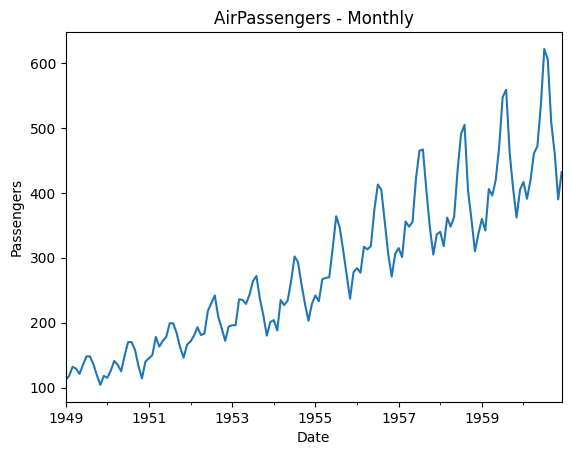

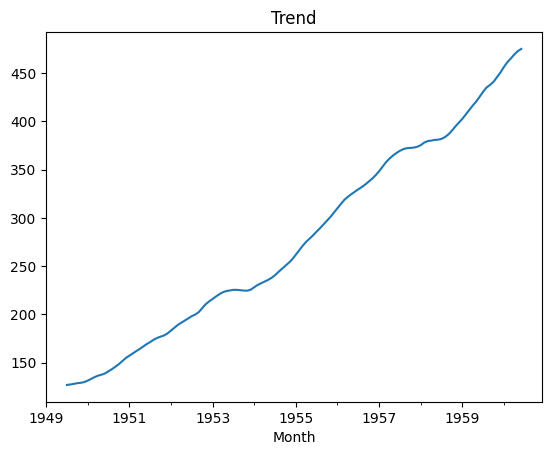

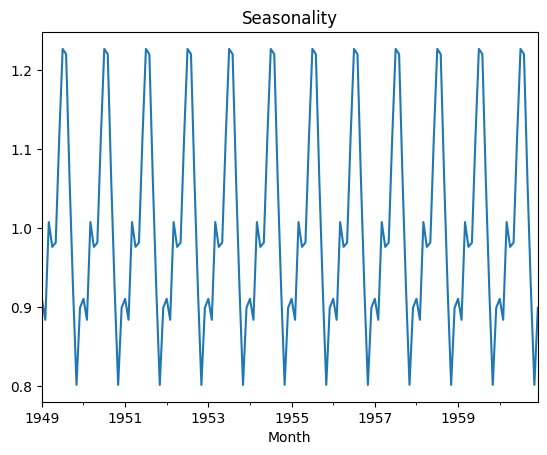

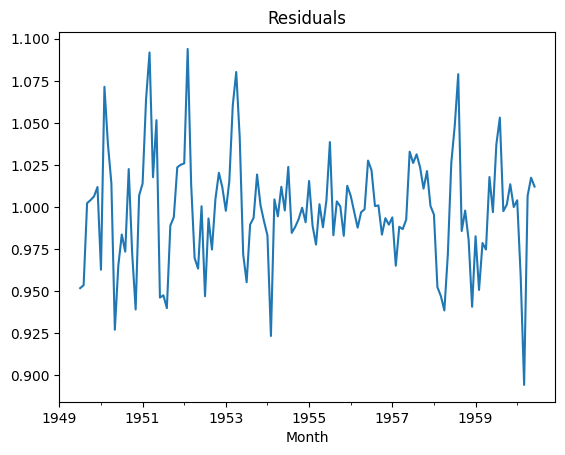

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = "https://raw.githubusercontent.com/codebreaker-pk/Data_Science_With_Gen_Ai/main/MachineLearning/AirPassengers.csv"


df = pd.read_csv(url)

# Handle common column names
date_col = "Month" if "Month" in df.columns else "month"
value_col_candidates = ["#Passengers", "Passengers", "AirPassengers", "value", "passengers"]
value_col = next(c for c in value_col_candidates if c in df.columns)

# Build monthly time series
ts = pd.Series(df[value_col].values, index=pd.to_datetime(df[date_col]), name="Passengers").asfreq("MS")

# Plot original series
ts.plot(title="AirPassengers - Monthly")
plt.xlabel("Date"); plt.ylabel("Passengers"); plt.show()

# Decompose (12 = yearly seasonality for monthly data)
result = seasonal_decompose(ts, model="multiplicative", period=12)
result.trend.plot(title="Trend"); plt.show()
result.seasonal.plot(title="Seasonality"); plt.show()
result.resid.plot(title="Residuals"); plt.show()


### **Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/drive/MyDrive/Data Science With Gen Ai/Milestone_3_MachineLearning/Anomaly detection and Time Series/NYC_taxi_fare_data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB
None


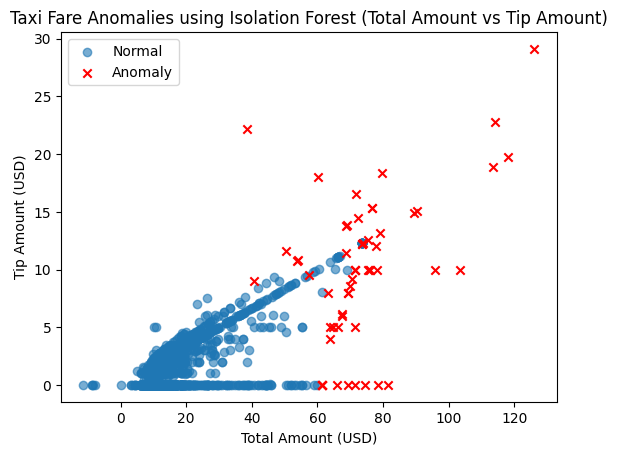

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


df = pd.read_csv("/content/drive/MyDrive/Data Science With Gen Ai/Milestone_3_MachineLearning/Anomaly detection and Time Series/NYC_taxi_fare_data.csv")


# Use total_amount and tip_amount columns for anomaly detection
X = df[['total_amount','tip_amount']].dropna().sample(2000, random_state=42)

# Apply Isolation Forest
iso = IsolationForest(contamination=0.03, random_state=0)
X['anomaly'] = iso.fit_predict(X)

# Separate normal vs anomalies
normal = X[X['anomaly']==1]
outliers = X[X['anomaly']==-1]

# Plot scatter
plt.scatter(normal['total_amount'], normal['tip_amount'], label="Normal", alpha=0.6)
plt.scatter(outliers['total_amount'], outliers['tip_amount'], label="Anomaly", marker="x", c="red")
plt.title("Taxi Fare Anomalies using Isolation Forest (Total Amount vs Tip Amount)")
plt.xlabel("Total Amount (USD)"); plt.ylabel("Tip Amount (USD)"); plt.legend(); plt.show()

### **Question 8: Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results**

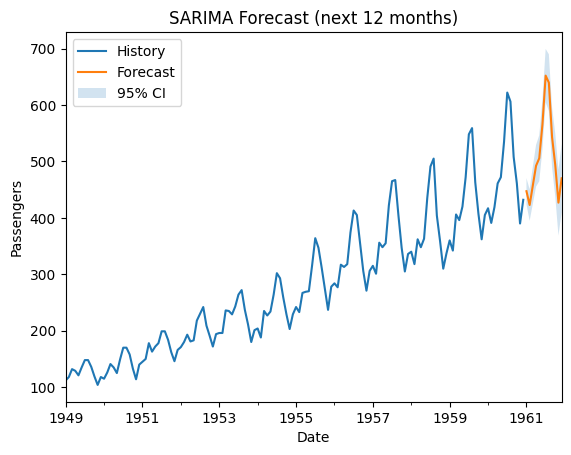

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

url = "https://raw.githubusercontent.com/codebreaker-pk/Data_Science_With_Gen_Ai/main/MachineLearning/AirPassengers.csv"

df = pd.read_csv(url)

# Handle common column names
date_col = "Month" if "Month" in df.columns else "month"
value_col_candidates = ["#Passengers", "Passengers", "AirPassengers", "value", "passengers"]
value_col = next(c for c in value_col_candidates if c in df.columns)

# Build monthly time series
y = pd.Series(df[value_col].values, index=pd.to_datetime(df[date_col]), name="Passengers").asfreq("MS")

# Fit SARIMA(p=1,d=1,q=1) × (P=1,D=1,Q=1, s=12)
model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

# Forecast next 12 months
fc = res.get_forecast(steps=12)
mean_fc = fc.predicted_mean
ci = fc.conf_int()

# Plot history + forecast + CI
y.plot(label="History")
mean_fc.plot(label="Forecast")
plt.fill_between(mean_fc.index, ci.iloc[:,0].values, ci.iloc[:,1].values, alpha=0.2, label="95% CI")
plt.title("SARIMA Forecast (next 12 months)")
plt.xlabel("Date"); plt.ylabel("Passengers"); plt.legend(); plt.show()

### **Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.**


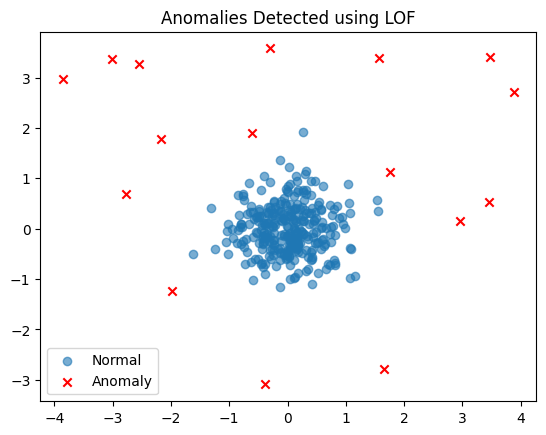

In [25]:
# Q9
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic 2D dataset
np.random.seed(42)
X = np.random.randn(300, 2) * 0.5
outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
data = np.vstack([X, outliers])

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(data)

# Separate normal vs anomalies
normal = data[labels==1]
anoms = data[labels==-1]

plt.scatter(normal[:,0], normal[:,1], label="Normal", alpha=0.6)
plt.scatter(anoms[:,0], anoms[:,1], label="Anomaly", marker="x", c="red")
plt.title("Anomalies Detected using LOF")
plt.legend(); plt.show()

### **Question 10: You are working as a data scientist for a power grid monitoring company.Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage. Explain your real-time data science workflow:**
-  How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
-  Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
-  How would you validate and monitor the performance over time?
-  How would this solution help business decisions or operations?

## 1. Detecting Anomalies in Streaming Data
To spot abnormal spikes or drops in energy usage collected every 15 minutes:

- **Isolation Forest (best fit):**
  - Works well on large, continuous data streams.
  - Learns patterns of normal usage; flags data points that are isolated (unusual).
  - Can adapt as new data comes in using a rolling training window.

- **Local Outlier Factor (LOF):**
  - Useful when anomalies depend on local neighborhood density.
  - Example: one region behaving differently compared to nearby regions.

- **DBSCAN:**
  - Good for identifying clusters of normal patterns and treating low-density points as anomalies.
  - Less suitable for high-frequency streaming because tuning parameters can be difficult.

**Choice:** For real-time streaming, **Isolation Forest** is preferred since it scales well and adapts easily.

---

## 2. Short-Term Forecasting Model
We need to predict energy usage in the next few hours:

- **ARIMA:** Works for stationary, non-seasonal series.
- **SARIMA:** Handles seasonal patterns (daily/weekly).
- **SARIMAX:** Extends SARIMA by including external (exogenous) factors like temperature, humidity, holidays.

**Choice:** **SARIMAX** is ideal because:
- Energy demand strongly depends on seasonality (daily, weekly cycles).
- Weather and holidays have a large effect on consumption.

---

## 3. Validation and Monitoring
To ensure accuracy and reliability:

- **Validation (offline before deployment):**
  - Use backtesting (train on past data, test on future).
  - Evaluate with RMSE, MAE, and MAPE for forecasting.
  - For anomalies, measure precision and recall if labeled incidents exist.

- **Monitoring (in production):**
  - Continuously compare predictions vs. actuals.
  - Track error metrics daily.
  - Monitor data quality (missing timestamps, duplicate entries).
  - Retrain models regularly (e.g., daily or weekly) to handle drift.

---

## 4. Business Value
This system directly supports grid operations:

- **Operational efficiency:** Detects spikes/drops early, reducing blackouts or overloads.
- **Cost savings:** Improves scheduling of energy generation and purchasing.
- **Reliability:** Helps maintain stable supply for customers.
- **Planning:** Long-term insights from anomalies help identify weak areas in the grid.

---



## Question 10: Real-time Anomaly Detection and Time Series Forecasting Simulation

Simulate a real-time data stream for energy usage, applying anomaly detection and time series forecasting as new data points arrive. Visualize the results dynamically.

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Parameters (Reduced for faster execution)
n_regions = 1 # Reduced number of regions
duration_days = 7 # Reduced duration to 7 days
freq = '15min'  # 15-minute intervals
n_points = duration_days * 24 * 60 // 15 * n_regions

# Generate timestamps
timestamps = pd.date_range(start='2023-01-01', periods=n_points // n_regions, freq=freq).tolist() * n_regions
timestamps.sort()

# Generate regions
regions = [f'Region_{i+1}' for i in range(n_regions)] * (n_points // n_regions)
regions.sort(key=lambda x: x.split('_')[1]) # Keep timestamps grouped by region

# Generate base energy usage (trend + seasonality)
time_index = np.arange(n_points // n_regions)
energy_base = (
    1000  # Base level
    + 0.5 * time_index  # Trend
    + 200 * np.sin(2 * np.pi * time_index / (24 * 60 // 15))  # Daily seasonality
    + 50 * np.sin(2 * np.pi * time_index / (7 * 24 * 60 // 15)) # Weekly seasonality (more relevant for shorter duration)
)

# Introduce variations per region
energy_usage = np.tile(energy_base, n_regions) * (1 + np.random.randn(n_points) * 0.02) # Reduced variation

# Generate weather data (temperature and humidity)
temperature = 15 + 5 * np.sin(2 * np.pi * np.arange(n_points) / (7 * 24 * 60 // 15)) + np.random.randn(n_points) * 1
humidity = 50 + 10 * np.sin(2 * np.pi * np.arange(n_points) / (7 * 24 * 60 // 15) + np.pi/2) + np.random.randn(n_points) * 2

# Add random noise
noise = np.random.randn(n_points) * 20 # Reduced noise
energy_usage += noise

# Introduce anomalies (Reduced number)
n_anomalies = int(0.005 * n_points)
anomaly_indices = np.random.choice(n_points, n_anomalies, replace=False)
energy_usage[anomaly_indices] *= np.random.choice([0.5, 1.5], size=n_anomalies) # Smaller spikes and drops

# Scale energy usage to a more realistic range
scaler = MinMaxScaler(feature_range=(500, 2000)) # Adjusted range
energy_usage = scaler.fit_transform(energy_usage.reshape(-1, 1)).flatten()


# Create DataFrame
simulated_df = pd.DataFrame({
    'timestamp': timestamps,
    'region': regions,
    'energy_usage': energy_usage,
    'temperature': temperature,
    'humidity': humidity
})

# Set timestamp as index for time series analysis
simulated_df['timestamp'] = pd.to_datetime(simulated_df['timestamp'])
simulated_df = simulated_df.set_index('timestamp')

display(simulated_df.head())
display(simulated_df.info())

,region,energy_usage,temperature,humidity
timestamp,,,,
2023-01-01 00:00:00,Region_1,1038.193922,14.825040,59.962582
2023-01-01 00:15:00,Region_1,1125.009417,14.291004,59.222526
2023-01-01 00:30:00,Region_1,1137.157429,15.630004,62.246477
2023-01-01 00:45:00,Region_1,1175.879891,14.241763,61.891119
2023-01-01 01:00:00,Region_1,1123.745579,15.215137,58.447252


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2023-01-01 00:00:00 to 2023-01-07 23:45:00
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        672 non-null    object 
 1   energy_usage  672 non-null    float64
 2   temperature   672 non-null    float64
 3   humidity      672 non-null    float64
dtypes: float64(3), object(1)
memory usage: 26.2+ KB


None

In [27]:
print("Missing values before handling:")
print(simulated_df.isnull().sum())

simulated_df['hour'] = simulated_df.index.hour
simulated_df['day_of_week'] = simulated_df.index.dayofweek
simulated_df['month'] = simulated_df.index.month

display(simulated_df.head())

Missing values before handling:
region          0
energy_usage    0
temperature     0
humidity        0
dtype: int64


,region,energy_usage,temperature,humidity,hour,day_of_week,month
timestamp,,,,,,,
2023-01-01 00:00:00,Region_1,1038.193922,14.825040,59.962582,0,6,1
2023-01-01 00:15:00,Region_1,1125.009417,14.291004,59.222526,0,6,1
2023-01-01 00:30:00,Region_1,1137.157429,15.630004,62.246477,0,6,1
2023-01-01 00:45:00,Region_1,1175.879891,14.241763,61.891119,0,6,1
2023-01-01 01:00:00,Region_1,1123.745579,15.215137,58.447252,1,6,1


In [28]:
from sklearn.ensemble import IsolationForest

# Select the 'energy_usage' column
X_anomaly = simulated_df[['energy_usage']]

# Initialize Isolation Forest model
# Contamination is set based on the anomaly injection rate (0.5%)
iso_forest = IsolationForest(contamination=0.005, random_state=42)

# Fit the model and predict anomalies
simulated_df['anomaly'] = iso_forest.fit_predict(X_anomaly)

# Print the count of each anomaly label
print("Anomaly labels count:")
print(simulated_df['anomaly'].value_counts())

Anomaly labels count:
anomaly
 1    668
-1      4
Name: count, dtype: int64


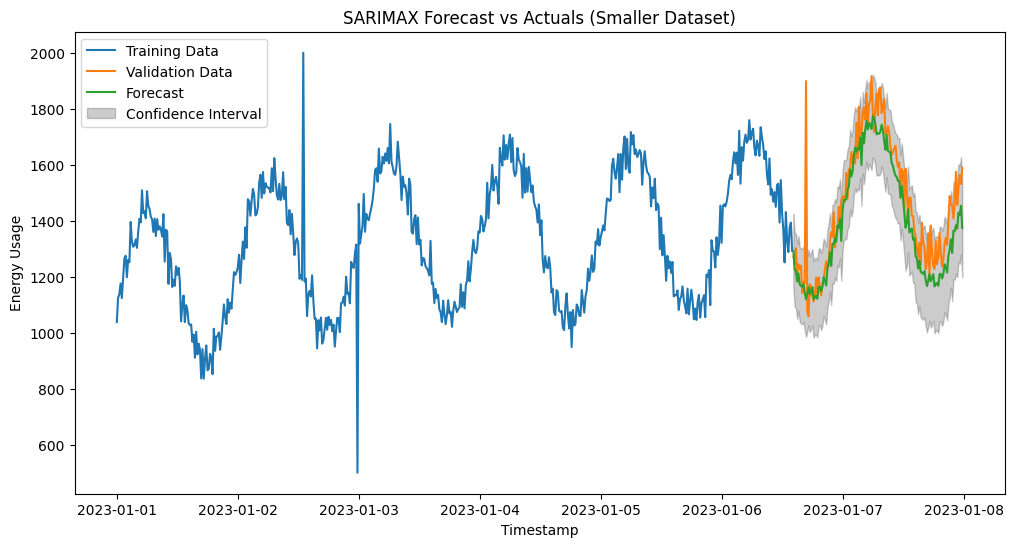

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Select the 'energy_usage' column and ensure it's a Series with timestamp index
energy_ts = simulated_df['energy_usage']

# 2. Split the data into training and validation sets (80/20 split)
train_size = int(len(energy_ts) * 0.8)
train_data, validation_data = energy_ts[0:train_size], energy_ts[train_size:]

# 4. Define the order and seasonal order for the SARIMAX model
# Assuming 15-minute frequency, there are 96 time steps in a day (24 * 4)
# Using a smaller seasonal period for faster execution (e.g., daily seasonality)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 96) # Still using daily seasonality for relevance

# 5. Instantiate the SARIMAX model with the training data and the defined orders
# Use enforce_stationarity and enforce_invertibility as False for robustness
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)

# 6. Fit the SARIMAX model to the training data
# Using disp=False to suppress optimization output
results = model.fit(disp=False)

# 7. Generate forecasts for the validation period
forecast_steps = len(validation_data)
forecast = results.get_forecast(steps=forecast_steps)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# 8. Compare the forecasted values with the actual values in the validation set (optional visualization)
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(validation_data.index, validation_data, label='Validation Data')
plt.plot(predicted_mean.index, predicted_mean, label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.2, label='Confidence Interval')
plt.title('SARIMAX Forecast vs Actuals (Smaller Dataset)')
plt.xlabel('Timestamp')
plt.ylabel('Energy Usage')
plt.legend()
plt.show()

Initial SARIMAX model fitted for real-time simulation.
Initial Isolation Forest model fitted for real-time simulation.
Showing static snapshots of the real-time simulation (Smaller Dataset)...


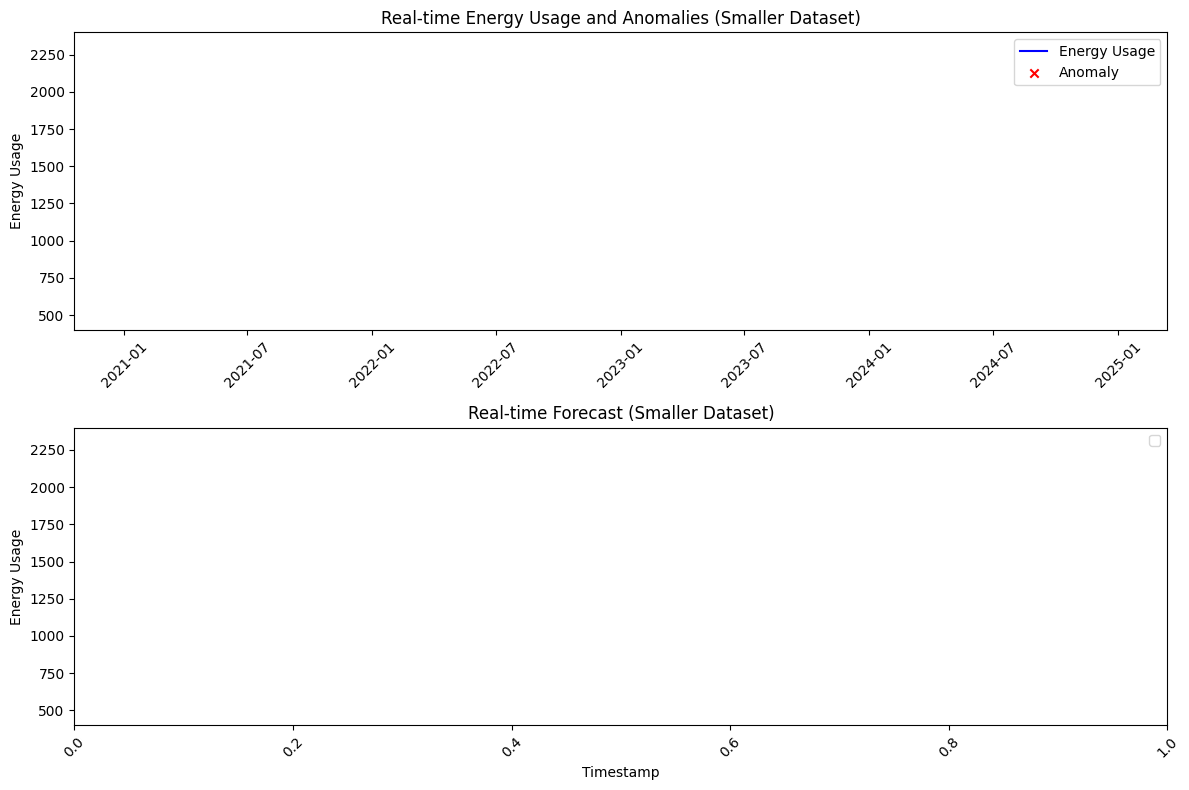

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [30]:
import time
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'simulated_df' is already loaded and preprocessed with 'anomaly' column

# Set up the figure and axes for real-time plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Initialize data queues for plotting (Adjusted for smaller dataset)
max_data_points = 100 # Display the last 100 data points
time_data = deque(maxlen=max_data_points)
energy_data = deque(maxlen=max_data_points)
anomaly_data = deque(maxlen=max_data_points)
forecast_data = deque(maxlen=max_data_points)

# Initialize SARIMAX model for forecasting (using a smaller subset for demonstration)
# In a real-world scenario, you would retrain or update the model periodically
train_size_realtime = int(len(simulated_df) * 0.5) # Use a larger percentage for initial training on smaller dataset
initial_train_data = simulated_df['energy_usage'].iloc[:train_size_realtime]

# Define model parameters (using the same as before for consistency)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 96) # Still using daily seasonality for relevance

try:
    sarimax_model_realtime = SARIMAX(initial_train_data, order=order, seasonal_order=seasonal_order,
                                      enforce_stationarity=False, enforce_invertibility=False)
    sarimax_results_realtime = sarimax_model_realtime.fit(disp=False)
    print("Initial SARIMAX model fitted for real-time simulation.")
except Exception as e:
    print(f"Error fitting initial SARIMAX model: {e}")
    sarimax_results_realtime = None


# Initialize Isolation Forest model
iso_forest_realtime = IsolationForest(contamination=0.005, random_state=42)
# Fit the model on the initial training data to start
iso_forest_realtime.fit(initial_train_data.values.reshape(-1, 1))
print("Initial Isolation Forest model fitted for real-time simulation.")


# Simulation loop
def update(frame):
    if frame >= len(simulated_df):
        return

    # Get the current data point from the simulated DataFrame
    current_data = simulated_df.iloc[frame]
    timestamp = current_data.name
    energy_usage = current_data['energy_usage']
    actual_anomaly = current_data['anomaly'] # Use the pre-calculated anomaly for visualization

    # Append data to queues
    time_data.append(timestamp)
    energy_data.append(energy_usage)
    anomaly_data.append(actual_anomaly)

    # Anomaly Detection (real-time prediction)
    # In a real-time scenario, you would predict on the single new data point
    # For this simulation, we'll just use the pre-calculated 'anomaly' column for visualization
    # predicted_anomaly = iso_forest_realtime.predict([[energy_usage]])[0]


    # Time Series Forecasting (predict the next step)
    forecast_value = None
    if sarimax_results_realtime:
        try:
            # Forecast the next step based on the most recent data in the queue
            # In a true real-time system, you might refit or use a rolling forecast
            latest_data_for_forecast = pd.Series(list(energy_data), index=list(time_data))
            if len(latest_data_for_forecast) > seasonal_order[3]: # Ensure enough data for seasonal forecast
                 forecast_result = sarimax_model_realtime.filter(latest_data_for_forecast[-seasonal_order[3]-1:]).get_forecast(steps=1)
                 forecast_value = forecast_result.predicted_mean.iloc[0]

        except Exception as e:
             # This can happen if the model is not robust enough for the new data
             # print(f"Error during real-time forecasting: {e}")
             pass # Suppress frequent errors during simulation

    forecast_data.append(forecast_value)

    # Clear previous plots
    ax1.clear()
    ax2.clear()

    # Plot energy usage with anomalies
    ax1.plot(list(time_data), list(energy_data), label='Energy Usage', color='blue')
    anomaly_points_x = [time_data[i] for i, anomaly in enumerate(anomaly_data) if anomaly == -1]
    anomaly_points_y = [energy_data[i] for i, anomaly in enumerate(anomaly_data) if anomaly == -1]
    ax1.scatter(anomaly_points_x, anomaly_points_y, color='red', marker='x', label='Anomaly')
    ax1.set_title('Real-time Energy Usage and Anomalies (Smaller Dataset)')
    ax1.set_ylabel('Energy Usage')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylim(simulated_df['energy_usage'].min() * 0.8, simulated_df['energy_usage'].max() * 1.2) # Set y-limits for better visualization


    # Plot forecast
    # We plot the forecast at the time of the last data point received for simplicity in this simulation
    if forecast_value is not None:
        ax2.plot(list(time_data), list(forecast_data), label='Forecast', color='green')
    ax2.set_title('Real-time Forecast (Smaller Dataset)')
    ax2.set_xlabel('Timestamp')
    ax2.set_ylabel('Energy Usage')
    ax2.legend()
    ax2.tick_params(axis='x', rotation=45)
    ax2.set_ylim(simulated_df['energy_usage'].min() * 0.8, simulated_df['energy_usage'].max() * 1.2) # Set y-limits


    plt.tight_layout()


# Set up the animation
# Use a smaller interval for faster simulation, increase for slower
ani = animation.FuncAnimation(fig, update, frames=len(simulated_df), repeat=False, interval=1)

# To display the animation in a Jupyter Notebook/Colab, you might need to save it
# as a video or use a specific display function if available.
# For a basic inline plot update, you might need a different approach or less data.
# For this large dataset simulation, saving is more practical or just running it
# in a script that supports interactive matplotlib plots.

# Due to the size of the dataset and real-time simulation, displaying the animation
# directly inline in Colab for the entire duration might not be feasible or smooth.
# We will show the first few updates as static plots for demonstration, or you can
# uncomment the line below to save the animation as a gif (may take a long time).

# ani.save('real_time_monitoring_smaller.gif', writer='pillow')

# Alternatively, display a few static frames to show the update process
print("Showing static snapshots of the real-time simulation (Smaller Dataset)...")
for i in range(0, min(200, len(simulated_df)), 50): # Show first few snapshots (adjust as needed)
    update(i)
    plt.show()